# Análsiis de la secuencia genomica de COVID-19 // Primer paciente con Covid secuenciado en China

In [2]:
from Bio import Entrez, SeqIO
Entrez.email = "alejandro.enet1991@gmail.com"
handle = Entrez.efetch(db="nucleotide", id = "MN908947", rettype = "gb",  retmode="text")
recs = list(SeqIO.parse(handle,"gb"))
handle.close()

In [3]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [4]:
covid_sequence = recs[0].seq
len(covid_sequence)
print(f"El genmoma del Covid-19 consisten en {len(covid_sequence)} nucleótidos")

El genmoma del Covid-19 consisten en 29903 nucleótidos


In [5]:
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_sequence)
print(f"El peso molecular del genoma del Covid-19 es de {molecular_weight(covid_sequence)}")

El peso molecular del genoma del Covid-19 es de 9241219.214400413


In [6]:
from Bio.SeqUtils import GC
GC(covid_sequence)
print(f"La proporcion de bases de GC en el genoma del Covid-19 es de {GC(covid_sequence)}%")

La proporcion de bases de GC en el genoma del Covid-19 es de 37.97277865097148%


C:\Users\Admin\anaconda3\lib\site-packages\Bio\SeqUtils\__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nucleotidos', ylabel='valor'>

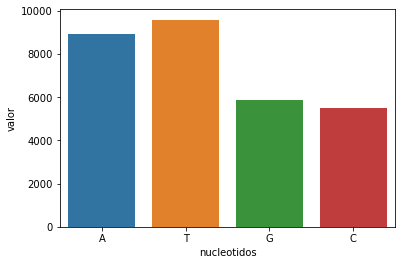

In [7]:
# Se puede armar un diccionario para el conteo del número de bases

import seaborn as sns
import pandas as pd

nucleotidos = {"nucleotidos": ["A","T","G","C"], "valor": [covid_sequence.count("A"),covid_sequence.count("T"),covid_sequence.count("G"),covid_sequence.count("C")]}
nucleotidos = pd.DataFrame(nucleotidos)

nucleotidos

sns.barplot(nucleotidos["nucleotidos"],nucleotidos["valor"])





In [8]:
# Se puede obtener la secuencia de ARN
arn_covid = covid_sequence.transcribe()
arn_covid
# Se puede obtener la secuencia de aminoacidos
amino_covid = covid_sequence.translate()
amino_covid

C:\Users\Admin\anaconda3\lib\site-packages\Bio\Seq.py:3482: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [9]:
# Se puede buscar el aminoacido en mayor frecuencia o graficarlos en funcion de esto
from collections import Counter
aminoacidos = Counter(amino_covid)


elementos = [{'aminoacido': k, 'Frecuencia': v} for k, v in aminoacidos.most_common()]

# Crear un dataframe a partir de la lista de diccionarios
df = pd.DataFrame(elementos)

# eliminamos el stop
mascara = df["aminoacido"] == "*"
filas_eliminar = df[mascara]
df = df.drop(filas_eliminar.index)
df


,aminoacido,Frecuencia
0,L,886
1,S,810
3,T,679
4,C,635
5,F,593
6,R,558
7,V,548
8,Y,505
9,N,472
10,I,436


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frecuencia', ylabel='aminoacido'>

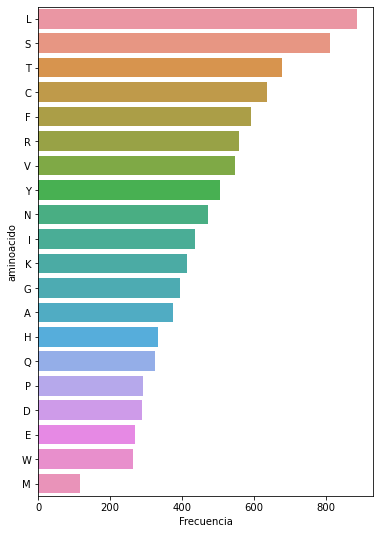

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 9))
sns.barplot(df["Frecuencia"],df["aminoacido"])

In [28]:
#Podemos obtner una lista de secuencias de proteinas considernado las secuencias entre stopcodons
amino_covid
lista_secuencia_amiinoacidos = amino_covid.split("*")
len(lista_secuencia_amiinoacidos)
print(f"El genoma de Covid-19 contiene  {len(lista_secuencia_amiinoacidos)} secuencias de aminoacidos")
#Considerando de que las proteínas con funcionalidad deberian tener mas de 20 aminoacidos

proteinas = list()

for secuencia in lista_secuencia_amiinoacidos:
    if len(secuencia) >= 20:
        proteina = secuencia
        proteinas.append(proteina)
        
proteinas
print(f"Donde {len(proteinas)} codifican para proteínas de mas de 20 aa")
proteinas = sorted(proteinas, key= len, reverse=True)
proteinas


El genoma de Covid-19 contiene  775 secuencias de aminoacidos
Donde 80 codifican para proteínas de mas de 20 aa


[Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN'),
 Seq('ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQA...VPL'),
 Seq('TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADN...KTE'),
 Seq('AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...LLV'),
 Seq('QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQL...EID'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV'),
 Seq('DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS'),
 Seq('LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG'),
 Seq('KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM'),
 Seq('FLWKGLSSYVLPSVSTSWCSLLACDLCPCTRKELHNCSCHLS'),
 Seq('LNCAWMRLVLNHPFSTSISVIIQFPVYLLQLIARNLNWVVL'),
 Seq('RNFVLHRRCFTYKVLRIQRSYYGCFLQRKQLHNNHKTSYL'),
 Seq('IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW'),
 Seq('YVYTTNSTYWCFGHISIYSSWWYCSYRSNMPCLLFYEV'),
 Seq('CFFFSTYSVDGYVHTFSTFLDNNCLYHLYFHKAFLLVL'),
 Seq('CGSATSLLLSDCLRVRVPCGHSIQKLTFFSTCHSMALF'),
 Seq('NSCYNATWLCNTWLKFGRSCSVYEISQ

In [29]:
# Guardamos las secuencias en formato fasta

with open("protein_seq.fasta", "w") as file:
    file.write(">covid protein sequences\n")
    for proteina in proteinas:
        file.write(f"{proteina}\n")